In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
features = df.drop(['diagnosis'], axis = 1)
target = df['diagnosis']

In [5]:
m = len(target)
n = features.shape[1]
X = np.ones([m, n+1])
X[:, 1:] = features
y = np.array(target).reshape(-1, 1)
print(X.shape, y.shape)

(569, 6) (569, 1)


## Visualizing distribution of the data

Text(0, 0.5, 'Diagnosis')

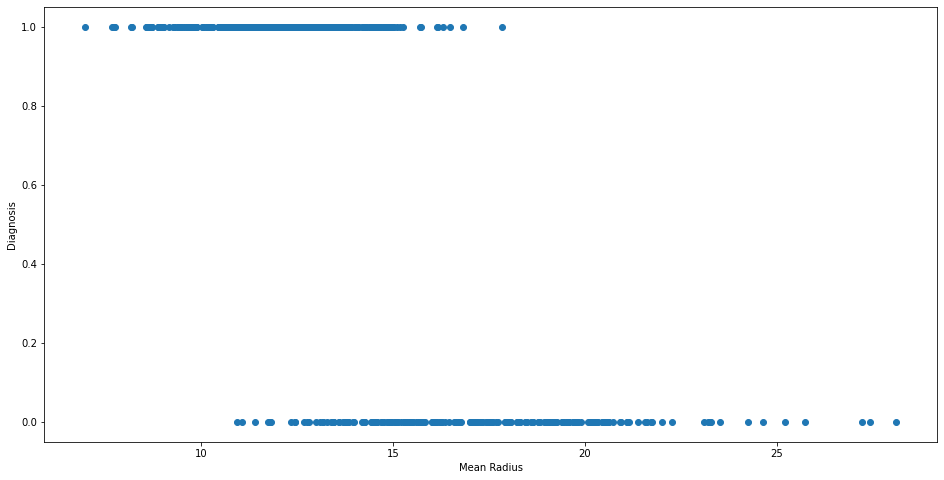

In [6]:
plt.figure(figsize = (16, 8))
plt.scatter(X[:, 1], y)
plt.xlabel('Mean Radius')
plt.ylabel('Diagnosis')

# Logistic Regression with Gradient Descent

## Prediction for Logistic Regression

In [7]:
theta = np.array([-10, 0.1, 0.1, 0.01, 0.001, 10]).reshape(-1, 1)
z = np.dot(X, theta)
pred = 1 / (1 + np.exp(-z))
pred.shape

(569, 1)

In [8]:
print(pred[:5], y[:5])

[[0.02297737]
 [0.06515571]
 [0.09054488]
 [0.01429989]
 [0.05284999]] [[0]
 [0]
 [0]
 [0]
 [0]]


## Cost Function

In [9]:
def cost_function(X, y, theta):
    m = len(y)
    z = np.dot(X, theta)
    pred = 1 / (1 + np.exp(-z))
    J = (-1) * np.sum(np.dot(np.transpose(y), np.log(pred)) + np.dot(np.transpose(1 - y), np.log(1 - pred))) / m
    return J

In [10]:
cost_function(X, y, theta)

3.0657567779059764

# Gradient Descent

In [11]:
def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    for i in range(iters):
        z = np.dot(X, theta)
        pred = 1 / (1 + np.exp(-z))
        theta = theta - np.dot(np.transpose(X), (pred - y)) * (alpha / m)
        J = cost_function(X, y, theta)
    return J, theta

### Tuning parameters alpha & number of iterations for getting best possible prediction accuracy

In [12]:
J_min, theta_min = gradient_descent(X, y, theta, 0.1, 700)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [13]:
theta_min

array([[ -3.43956557],
       [ 48.28918594],
       [ 80.55497928],
       [283.57597388],
       [-39.01035722],
       [ 10.47764933]])

### Calculating prediction accuracy

In [14]:
z = np.dot(X, theta_min)
best_preds = 1 / (1 + np.exp(-z))
for i in range(len(y)):
    if best_preds[i] <= 0.5:
        best_preds[i] = 0
    else:
        best_preds[i] = 1
accuracy_score(y, best_preds)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.8330404217926186

# sklearn LogisticRegression

In [15]:
logreg = LogisticRegression().fit(features, target)
sk_preds = logreg.predict(features)
accuracy_score(target, sk_preds)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9121265377855887

In [16]:
logreg.coef_

array([[ 2.89862236, -0.22713431, -0.67977634,  0.00645677, -0.49914334]])

In [17]:
logreg.intercept_

array([22.62046563])

In [18]:
sk_theta = np.ones([6, 1])
sk_theta[0, 0] = logreg.intercept_[0]
sk_theta[1:, 0] = logreg.coef_[0]

## Visualizing distribution of classes

zero: 212, one: 357


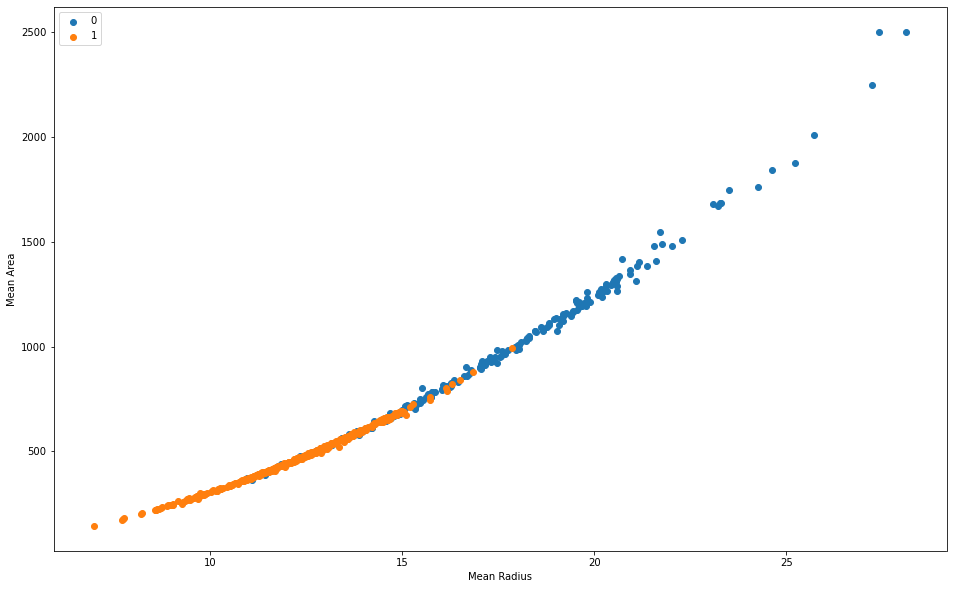

In [19]:
df0 = df.loc[df['diagnosis'] == 0]
df1 = df.loc[df['diagnosis'] == 1]
print("zero: " + str(df0.shape[0]) + ", one: " + str(df1.shape[0]))
plt.figure(figsize = (16, 10))
plt.scatter(df0['mean_radius'], df0['mean_area'], label = '0')
plt.scatter(df1['mean_radius'], df1['mean_area'], label = '1')
plt.xlabel("Mean Radius")
plt.ylabel("Mean Area")
plt.legend()

## Comparing Gradient Descent & sklearn Logistic Regression

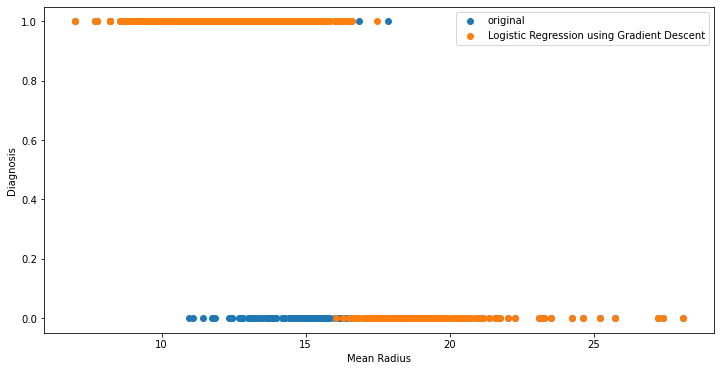

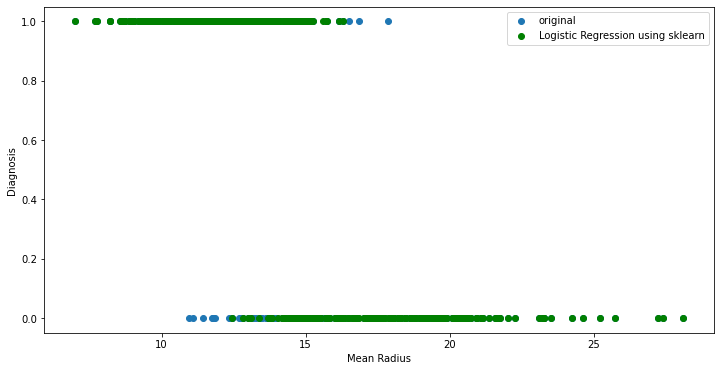

In [20]:
plt.figure(figsize = (12, 6))
plt.scatter(X[:, 1], y, label = 'original')
plt.scatter(X[:, 1], best_preds, label = 'Logistic Regression using Gradient Descent')
plt.xlabel('Mean Radius')
plt.ylabel('Diagnosis')
plt.legend()
plt.figure(figsize = (12, 6))
plt.scatter(X[:, 1], y, label = 'original')
plt.scatter(X[:, 1], sk_preds, label = 'Logistic Regression using sklearn', color = 'g')
plt.xlabel('Mean Radius')
plt.ylabel('Diagnosis')
plt.legend()

**According to the above visuals, it can be observed that the lag for gradient descent is occuring in predicting zeros, everything else is just fine, which may be because of the regularisation that is applied by default in sklearn LogisticRegression or may be gradient descent is not giving us global minimum, instead its giving a local minimum based on the initial values of weights(i.e. theta).**

Basically the aim of this notebook was to implement ***Logistic Regression from Scratch*** which is now achieved.

# Linear Regression using Normal Equation
***theta = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y***

In [21]:
mat = np.dot(np.transpose(X), X)
inv = np.linalg.inv(mat)
k = np.dot(np.transpose(X), y)
theta_m = np.dot(inv, k)

In [22]:
preds = np.dot(X, theta_m)
for i in range(len(y)):
    if preds[i] <= 0.5:
        preds[i] = 0
    else:
        preds[i] = 1
accuracy_score(y, preds)

0.9314586994727593

# sklearn Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X, y)
lin_preds = linreg.predict(X)
for i in range(len(y)):
    if lin_preds[i] <= 0.5:
        lin_preds[i] = 0
    else:
        lin_preds[i] = 1
accuracy_score(y, preds)

0.9314586994727593

*Linear Regression using Normal Equation just gives the exact same result as sklearn Linear Regression.*

Basically the above two same results tells us that our implementation of Linear Regression using Normal Equation is just fine.

### Comapring Linear Regression & sklearn Logistic Regression

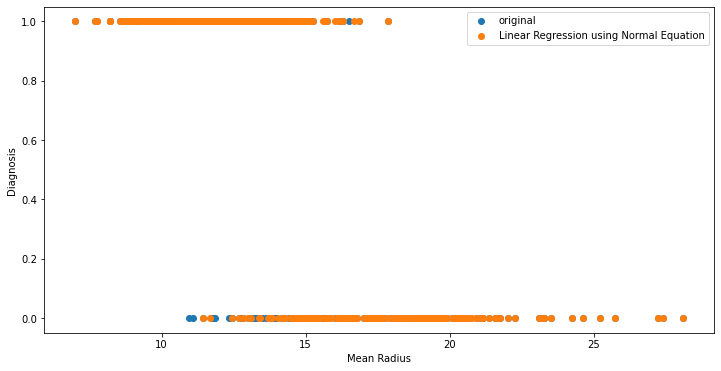

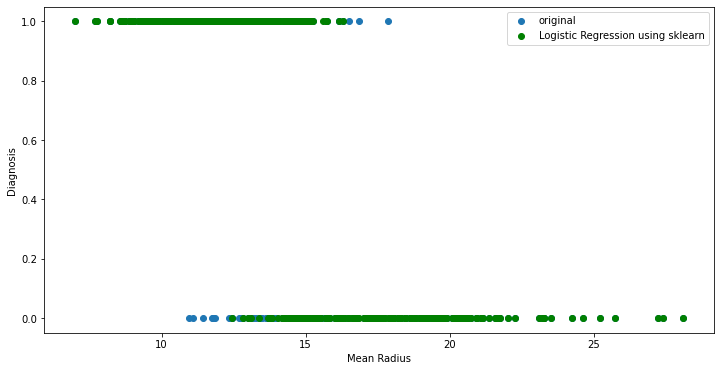

In [24]:
plt.figure(figsize = (12, 6))
plt.scatter(X[:, 1], y, label = 'original')
plt.scatter(X[:, 1], preds, label = 'Linear Regression using Normal Equation')
plt.xlabel('Mean Radius')
plt.ylabel('Diagnosis')
plt.legend()
plt.figure(figsize = (12, 6))
plt.scatter(X[:, 1], y, label = 'original')
plt.scatter(X[:, 1], sk_preds, label = 'Logistic Regression using sklearn', color = 'g')
plt.xlabel('Mean Radius')
plt.ylabel('Diagnosis')
plt.legend()

It turns out that linear regression is performing better than sklearn Logistic Regression.

***Hence the best accuracy was achieved by Linear Regression(comparitively between Linear & Logistic Regression) where both were implemented by writing custom code from scratch.***